In [1]:
import os
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import subplots
import plotly.graph_objs as go
print(__version__)
import cufflinks as cf
# Para Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

ModuleNotFoundError: No module named 'plotly'

In [2]:
xrd = pd.read_csv('LCCu1.txt', skipinitialspace=True, skiprows= 134)
xrd.dropna(axis=1, inplace = True)
xData = xrd['Angle']
yData = xrd['Det1Disc1']

def pvoigt(x, A, mu, sigma, alpha, K):
    sigmag=sigma*math.sqrt(2*math.log(2))
    return ((1-alpha)*A/(sigmag*math.sqrt(2*math.pi))) * (np.exp(-(x-mu)**2 / (2*sigmag**2))) + (alpha*A/math.pi)*(sigma/((x - mu)**2 + sigma**2)) + K


# init_param = []

In [3]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=xData, y=yData))
ypv = pvoigt(xData[440:580], 1508.265, 35.565, 0.564, 1.103, 149.717)
fig.add_trace(go.Scatter(x=xData[440:580], y=ypv))




# fig = make_subplots()
# fig.add_trace(trace, x='Angle',y='Det1Disc1',mode="markers",name="LCCu1")
# fig.show()
# xrd.iplot(kind='scatter',x='Angle',y='Det1Disc1',mode='markers',size=5)
# ax.iplot(df['Angle'], pvoigt(df['Angle'], 1508.265, 35.565, 0.564, 1.103, 149.717), color='r', label='pvoigt')
# plt.scatter(df['Angle'], df['Int'], alpha=0.5, marker='x')

NameError: name 'go' is not defined

In [4]:
ip = [1000, 35, 0.5, 1, 200]   # pseudoVoigt: A, mu, sigma, alpha, K
# guess = [max(xrd['Det1Disc1'][440:580]),
#          np.mean(xrd['Angle'][440:580]),
#          0.5, 0, min(xrd['Det1Disc1'][440:580])]
a_point = 440
b_point = 580
r = xData[a_point:b_point]
n = len(xData[a_point:b_point])
y = np.empty(n)
for i in xData:
    y[i] = pvoigt(xData[i], ip[0], ip[1], ip[2], ip[3], ip[4])
    
# plt.scatter(xData, yData)
plt.plot(xData[a_point:b_point],y, 'r')


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

[9.10684300e+02 3.55655646e+01 4.96846528e-01 2.10809386e+02]


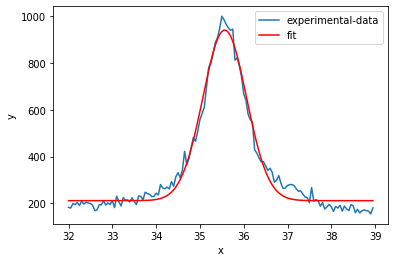

In [83]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
 
#Fitting function
# def func(x, a, b):
#     return a*np.exp(b*x)
    #return a*x+b

def func(x,a,b,c,k):
    return a / (c * math.sqrt(2 * math.pi)) * np.exp(-(x-b)**2 / (2*c**2)) + k    
    
#Experimental x and y data points    
xData = xrd['Angle'][440:580]
yData = xrd['Det1Disc1'][440:580]
 
#Plot experimental data points
plt.plot(xData, yData, label='experimental-data')
 
# Initial guess for the parameters
initialGuess = [1000, 35, 1, 200]    
 
#Perform the curve-fit
popt, pcov = curve_fit(func, xData, yData, initialGuess)
print(popt)
 
#x values for the fitted function
# xFit = np.arange(33, 39, 0.05)
xFit = xData
 
#Plot the fitted function
plt.plot(xFit, func(xFit, *popt), 'r', label='fit')#label='fit params: a=%5.3f, b=%5.3f' % tuple(popt))
 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()